<a href="https://colab.research.google.com/github/gomezalliyahdennisse/CCDEPLRL_EXERCISES_COM211/blob/main/Exercise5_CCDEPLRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [5]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2024-05-30 08:57:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.207, 173.194.215.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-05-30 08:57:53 ERROR 404: Not Found.



1. Create the LSTM model

In [6]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1)) #Embedding Layer
model.add(LSTM(150, return_sequences=True)) #LSTM Layer
model.add(Dropout(0.2)) #Dropout Layer
model.add(Bidirectional (LSTM(100))) #Another LSTM Layer
model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax')) #Dense Layer
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Loss function and an optimizer
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 256)           864000    
                                                                 
 lstm (LSTM)                 (None, 10, 150)           244200    
                                                                 
 dropout (Dropout)           (None, 10, 150)           0         
                                                                 
 bidirectional (Bidirection  (None, 200)               200800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 256)               51456     
                                                                 
 dense_1 (Dense)             (None, 3375)              867375    
                                                        

In [7]:
history = model.fit(predictors, label, epochs=300, verbose=1)

Epoch 1/300
484/484 [==============================] - 17s 17ms/step - loss: 7.0518 - accuracy: 0.0196
Epoch 2/300
484/484 [==============================] - 6s 11ms/step - loss: 6.5101 - accuracy: 0.0223
Epoch 3/300
484/484 [==============================] - 5s 10ms/step - loss: 6.4254 - accuracy: 0.0220
Epoch 4/300
484/484 [==============================] - 5s 10ms/step - loss: 6.3441 - accuracy: 0.0266
Epoch 5/300
484/484 [==============================] - 5s 9ms/step - loss: 6.2502 - accuracy: 0.0294
Epoch 6/300
484/484 [==============================] - 4s 9ms/step - loss: 6.1691 - accuracy: 0.0300
Epoch 7/300
484/484 [==============================] - 7s 14ms/step - loss: 6.0992 - accuracy: 0.0344
Epoch 8/300
484/484 [==============================] - 5s 11ms/step - loss: 6.0330 - accuracy: 0.0375
Epoch 9/300
484/484 [==============================] - 5s 10ms/step - loss: 5.9770 - accuracy: 0.0404
Epoch 10/300
484/484 [==============================] - 5s 10ms/step - loss: 5.9194

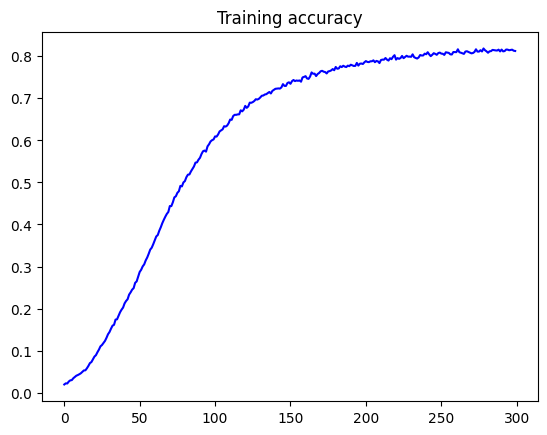

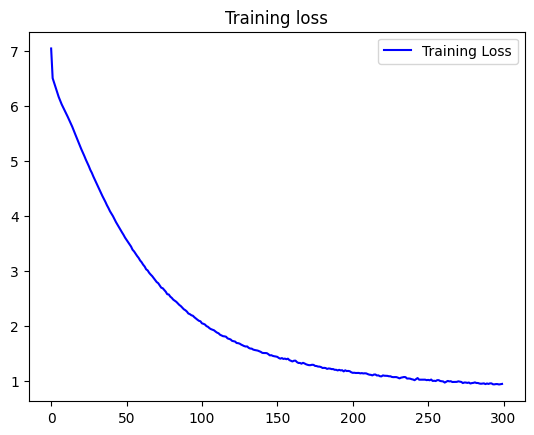

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 18ms/step
Help me Obi Wan Kenobi, you're my only hope or all no strife behind heaven where your true skill 'will' same 'will' eyes lose such good eternal bell that be room swift hate 'will' where 'will' where wanting where it should haste me to their heart same rhyme new rhyme staineth new ' some new due of good 'will ' which made no sad aspect dying thought give most most dear which due by more more 'will bright bright 'will ' some 'will' his 'will' leaves good painting hate dead night which needing repair 'will' where wanting due that for my head well made me well shame quite 'will
